# TP 1 : SD-TSIA2104

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Question 1

In [3]:
data =pd.read_csv('invest.txt', sep=' ')
data

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


## Question 2

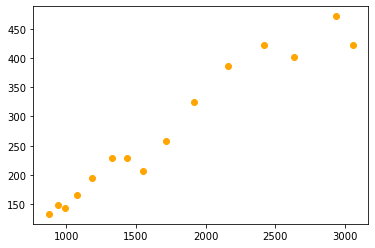

In [78]:
plt.scatter(data['gnp'],data['invest'],c='orange')

## Question 3

In [7]:
#transform in log
loggnp=np.log(data['gnp'])
loginvest=np.log(data['invest'])
n=len(loggnp)

#means
xmean =0
ymean=0
for j in range(n):
    xmean+=loggnp[j]
    ymean+=loginvest[j]
xmean=xmean/n
ymean=ymean/n


#compute beta 1 and beta 0
beta1=0
xvar=0
for i in range (n):
    beta1+=(loggnp[i]-xmean)*(loginvest[i]-ymean)
    xvar +=(loggnp[i]-xmean)**2
    
beta1=beta1/xvar
beta0= ymean-beta1*xmean

print("beta0 =",beta0,"beta1=",beta1)

#standard deviations
sigma2=0
for i in range(n):
    sigma2+=(loginvest[i]-(beta0+beta1*loggnp[i]))**2
sigma2=sigma2/(n-2)

st_b0= (sigma2*(1/n + xmean**2/xvar))**0.5
st_b1=(sigma2/xvar)**0.5
    
print("\nstandard deviation of beta0 =",st_b0,"\nstandard deviation of beta1 =",st_b1)

#R2

num=0
den=0
for i in range(n):
    num+=((beta0+beta1*loggnp[i])-ymean)**2
    den+=(loginvest[i]-ymean)**2
R2=num/den
print("\nDetermination coefficient R²=",R2)


beta0 = -1.9635913352301833 beta1= 1.015281401598871

standard deviation of beta0 = 0.4095472716623082 
standard deviation of beta1 = 0.055383060354852805

Determination coefficient R²= 0.9627572956057855


## Question 4

In [8]:
from scipy.stats import t
q5=t.ppf(0.975,n-2)
q5


2.1603686564610127

So the test is $\frac{\hat{\beta_1}}{\sqrt{\mathbb{V}[\hat{\beta_1}]}}\notin [-2.16,2.16]$ with $\alpha = 0.05$

In [63]:
value=beta1/st_b1
value

18.33198445686668

In [65]:
#p-value
print("the p-value is:",2*(1-t.cdf(value,n-2)))

the p-value is: 1.1363709973011282e-10


We can reject $H_0$ with a p-value risk

## Question 5

In [68]:
investment = beta0 + beta1*np.log(1000)
investment=np.exp(investment)
investment

155.97942793105466

In [13]:
#CI
q10=t.ppf(0.90,n-2)
up= beta0 +beta1*np.log(1000) + q10*sigma2*(1/n + (np.log(1000)-xmean)**2/xvar)**0.5
down = beta0 + beta1*np.log(1000) -q10*sigma2*(1/n + (np.log(1000)-xmean)**2/xvar)**0.5
up=np.exp(up)
down=np.exp(down)
print("[",down,",",up,"]")

[ 155.33995316759007 , 156.6215351658492 ]


## Question 6

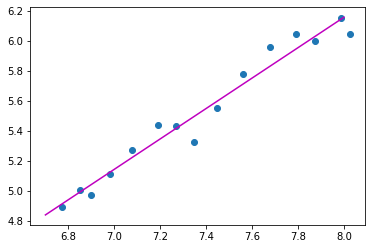

In [54]:
X = np.linspace(6.7,8,1000)
def regression(x):
    return beta0+beta1*x

def up(x):
    return  beta0 +beta1*x + q10*sigma2*(1/n + (x-xmean)**2/xvar)**0.5

def down(x) : 
    return beta0 + beta1*x -q10*sigma2*(1/n + (x-xmean)**2/xvar)**0.5
plt.scatter(loggnp,loginvest)
plt.plot(X,regression(X),color='m' )
#plt.plot(X,up(X),color='magenta',marker='o')
#plt.plot(X,down(X),color='magenta',marker = 'o')

## Question 7

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(loggnp).reshape(-1,1), np.array(loginvest))

In [37]:
reg.coef_

array([1.0152814])

In [38]:
reg.intercept_

-1.9635913352301815

In [39]:
reg.score(np.array(loggnp).reshape(-1,1), np.array(loginvest))

0.9627572956057855

In [44]:
predict_logy = reg.predict(np.array(np.log(1000)).reshape(-1,1))
predict_y = np.exp(predict_logy)
print(predict_y)

[155.97942793]


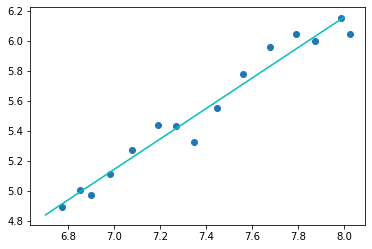

In [52]:
X = np.linspace(6.7,8,1000)
plt.scatter(loggnp,loginvest)
plt.plot(X,reg.predict(X.reshape(-1,1)),color='c')

## Question 9

In [96]:
gnp=np.array([data['gnp']]).T
invest = np.array([data['invest']]).T
interest = np.array([data['interest']]).T
ones=np.ones((len(data),1))

Z = np.concatenate((ones,gnp,interest), axis=1)
Gram= np.dot(Z.T,Z)
Gram_normalized=Grame/len(data)

In [97]:
print(Gram_normalized)

[[1.00000000e+00 1.74864667e+03 7.45266667e+00]
 [1.74864667e+03 3.56630045e+06 1.47355931e+04]
 [7.45266667e+00 1.47355931e+04 6.29237133e+01]]


## Question 10

In [104]:
betas = np.linalg.inv(Gram).dot(Z.T).dot(invest)
betas

array([[86.46978507],
       [ 2.34760143],
       [-6.90963374]])